In [2]:
import pandas as pd
import sidetable
import numpy as np

In [7]:
df = pd.read_csv('complete_3000_tm_plddt_perplexity.csv')
df

,ID,Perplexity,pLDDT,TM
0,4.2.1.1_162_5,1.0300825514372156.pdb,89.537468,0.94979
1,4.2.1.1_579_96,1.0268235988524594.pdb,89.725428,0.21642
2,4.2.1.1_294_4,1.0249868772328228.pdb,94.871653,0.25641
3,4.2.1.1_417_12,1.0278664190552391.pdb,90.747282,0.21371
4,4.2.1.1_377_88,1.0338043958086365.pdb,93.251728,0.21405
...,...,...,...,...
2995,4.2.1.1_315_33,1.0242980870593736.pdb,88.886724,0.20461
2996,4.2.1.1_555_5,1.0319587414419145.pdb,93.004406,0.19948
2997,4.2.1.1_319_12,1.032417416144532.pdb,92.853629,0.19808
2998,4.2.1.1_209_33,1.0280286823498297.pdb,90.924432,0.21408


In [6]:
#interpro and prot infer
df_combined = pd.read_csv('combined_interpro_protinfer_tm.csv')
df_combined

,ID,Perplexity,pLDDT,TM
0,4.2.1.1_100_29,1.033762,89.874202,0.21207
1,4.2.1.1_100_40,1.028002,89.776538,0.21130
2,4.2.1.1_100_51,1.031376,87.811590,0.22459
3,4.2.1.1_101_15,1.019743,91.012001,0.21607
4,4.2.1.1_101_47,1.017224,93.586299,0.22601
...,...,...,...,...
1237,4.2.1.1_9_0,1.033743,89.114001,0.22069
1238,4.2.1.1_9_2,1.031661,90.468219,0.21908
1239,4.2.1.1_9_28,1.020770,88.618814,0.23705
1240,4.2.1.1_9_36,1.021628,91.491166,0.21580


In [11]:
#Sequences incorrectly predicted 
df_diff = df[~df.index.isin(df_combined.index)]
df_diff

,ID,Perplexity,pLDDT,TM
1242,4.2.1.1_190_21,1.0303086771377852.pdb,93.263722,0.22521
1243,4.2.1.1_631_46,1.0298659765368812.pdb,90.665184,0.21148
1244,4.2.1.1_259_35,1.0336205124870985.pdb,90.861128,0.21214
1245,4.2.1.1_524_17,1.0297374620583362.pdb,91.257435,0.21787
1246,4.2.1.1_25_81,1.0268144202877119.pdb,90.178656,0.25168
...,...,...,...,...
2995,4.2.1.1_315_33,1.0242980870593736.pdb,88.886724,0.20461
2996,4.2.1.1_555_5,1.0319587414419145.pdb,93.004406,0.19948
2997,4.2.1.1_319_12,1.032417416144532.pdb,92.853629,0.19808
2998,4.2.1.1_209_33,1.0280286823498297.pdb,90.924432,0.21408


In [180]:
#Selected sequences based on the thresholds below
df_selected = df_combined.loc[(df_combined['pLDDT'] >= 85) & (df_combined['TM'] >= 0.9)]

In [181]:
len(df_selected)

19

In [159]:
df_combined_filtered = df_combined[~df_combined.index.isin(df_selected.index)]

In [160]:
#Correctly predicted excluding the 19 selected sequences 
df_combined_filtered

,ID,Perplexity,pLDDT,TM
0,4.2.1.1_100_29,1.033762,89.874202,0.21207
1,4.2.1.1_100_40,1.028002,89.776538,0.21130
2,4.2.1.1_100_51,1.031376,87.811590,0.22459
3,4.2.1.1_101_15,1.019743,91.012001,0.21607
4,4.2.1.1_101_47,1.017224,93.586299,0.22601
...,...,...,...,...
1237,4.2.1.1_9_0,1.033743,89.114001,0.22069
1238,4.2.1.1_9_2,1.031661,90.468219,0.21908
1239,4.2.1.1_9_28,1.020770,88.618814,0.23705
1240,4.2.1.1_9_36,1.021628,91.491166,0.21580


In [174]:
concatenated = pd.concat([df_diff.assign(Set='Total'),df_combined_filtered.assign(Set='Predicted Correctly'), df_selected.assign(Set='Selected')])

In [175]:
concatenated

,ID,Perplexity,pLDDT,TM,Set
1242,4.2.1.1_190_21,1.0303086771377852.pdb,93.263722,0.22521,Total
1243,4.2.1.1_631_46,1.0298659765368812.pdb,90.665184,0.21148,Total
1244,4.2.1.1_259_35,1.0336205124870985.pdb,90.861128,0.21214,Total
1245,4.2.1.1_524_17,1.0297374620583362.pdb,91.257435,0.21787,Total
1246,4.2.1.1_25_81,1.0268144202877119.pdb,90.178656,0.25168,Total
...,...,...,...,...,...
966,4.2.1.1_544_72,1.028786,87.031368,0.95359,Selected
1004,4.2.1.1_564_7,1.026144,87.232468,0.95676,Selected
1024,4.2.1.1_571_68,1.036372,86.468236,0.95875,Selected
1044,4.2.1.1_583_37,1.035595,87.195658,0.98856,Selected


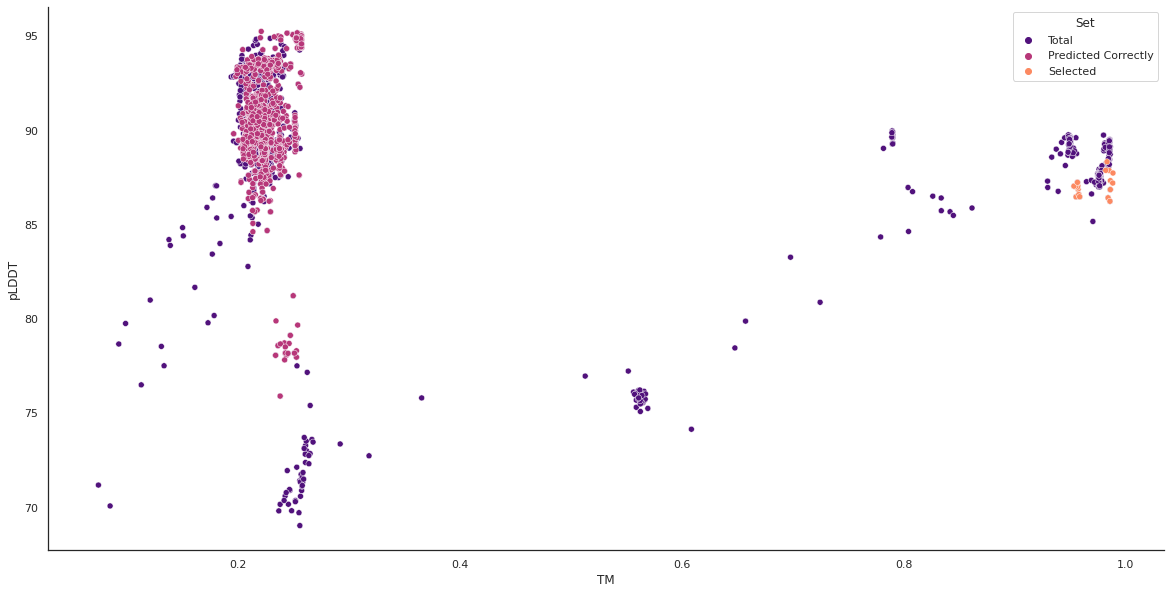

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
fig, ax = plt.subplots()
ax = sns.scatterplot(x='TM', y='pLDDT', data=concatenated, hue ='Set', palette="magma")
for patch in ax.artists:
     r, g, b, a = patch.get_facecolor()
     patch.set_facecolor((r, g, b, .3))
sns.despine();
plt.show()
fig.savefig("Carbonic_anhydrase.png", dpi=500)